<a href="https://colab.research.google.com/github/HugoSilvaRodrigues/BookMachineLearning/blob/main/Livro_cap_3_binaryClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import fetch_openml
import numpy as np

In [2]:
mnist=fetch_openml("mnist_784", version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X,y= mnist["data"], mnist["target"].astype(np.uint8)
X


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print(mnist["DESCR"])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 5, Length: 784, dtype: float64


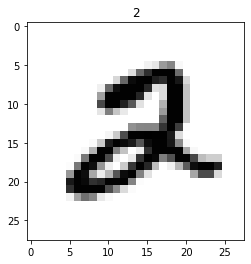

In [5]:
import matplotlib.pyplot as plt

digit=X.iloc[5,:]
target_digit=y[5]
print(digit)
digit_reshape=digit.values.reshape(28,28)
plt.imshow(digit_reshape,cmap="binary")#binary because the pixel can be black or white
plt.title(target_digit)
plt.show()

In [6]:
X_train,y_train,X_test,y_test=X[:60000],y[:60000],X[60000:],y[60000:]

## Creating a binary classify

In [7]:
y_train_2=(y_train==2)#True to all 2s, and false for the others numbers
y_test_2=(y_test==2)

In [8]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_2)
print(sgd_clf.predict([digit]))

[ True]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_2,cv=3,scoring="accuracy")

array([0.96645, 0.95895, 0.904  ])

In [10]:
print(y_train_2.value_counts())#the first model has a great accuracy because only 6K of the targets are 2

False    54042
True      5958
Name: class, dtype: int64


In [11]:
from sklearn.model_selection import cross_val_predict

y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_2,cv=3)

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_2,y_train_pred)

array([[51538,  2504],
       [  908,  5050]])

In [13]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_2,y_train_pred), 5050/(5050+2504) #tp/(tp+fp)

(0.6685199894095843, 0.6685199894095843)

In [14]:
recall_score(y_train_2,y_train_pred), 5050/(5050+908) #tp/(tp+fn)

(0.8475998657267539, 0.8475998657267539)

In [15]:
from sklearn.metrics import f1_score # Combination of recall and precision
f1_score(y_train_2,y_train_pred) # tp/(tp+((fn+fp)/2))

0.7474837181764358

In [16]:
#Basically the model calculates a score if this score is higher than the threshold the model defines if is a two or not. Now let's see how to define this treshold
y_score=cross_val_predict(sgd_clf,X_train,y_train_2,cv=3, method="decision_function")#using method="decision_function" it's possible to see the scores 
y_score

array([-36851.09465219, -31272.70892659, -21491.02754016, ...,
       -30052.05804538, -18789.24492043, -20051.24297549])

In [17]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,tresholds =precision_recall_curve(y_train_2,y_score)

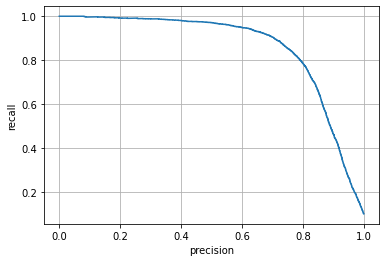

In [18]:

plt.plot(recalls,precisions)
plt.grid(True)
plt.xlabel("precision")
plt.ylabel("recall")
plt.show()


In [19]:
treshold_95_precision=tresholds[np.argmax(precisions>0.9)]#Defining a treshold for a model with 90% of precision
treshold_95_precision

5585.140261597363

In [20]:
y_train_predict_90_precision=(y_score >= treshold_95_precision)

precision_score(y_train_2,y_train_predict_90_precision)

0.9000641985876311

#Roc
## fpr = proportion of negatives instances classified as positive
## tpr = proportion of negativies instances classified as negative

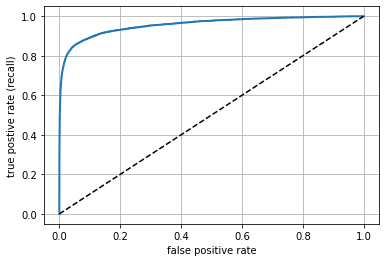

In [29]:
from sklearn.metrics import roc_curve

fpr,tpr,treshold= roc_curve(y_train_2,y_score) 

def plot_roc_curve(fpr,tpr):
  plt.plot(fpr,tpr,linewidth=2)
  plt.plot([0,1],[0,1],"k--")
  plt.grid(True)
  plt.xlabel("false positive rate")
  plt.ylabel("true postive rate (recall)")
  

plot_roc_curve(fpr,tpr)


In [26]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_2,y_score) #Looking in just this graph, we can think that the model had a good performance, but it's because the dataset has a small portion of numbers 2.

0.9568395257681235

#Creating a RandomForestClassifier to compare with the previous model

In [28]:
from sklearn.ensemble import RandomForestClassifier

forest_clf=RandomForestClassifier(random_state=42)
y_probas_forest=cross_val_predict(forest_clf,X_train,y_train_2,cv=3,method="predict_proba")

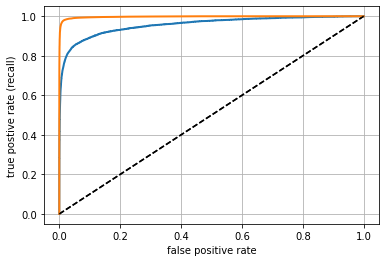

In [30]:
y_score_true=y_probas_forest[:,1]
fpr_forest,tpr_forest,treshold=roc_curve(y_train_2,y_score_true)
plot_roc_curve(fpr,tpr)
plot_roc_curve(fpr_forest,tpr_forest)
plt.show()#the orange represents the random forest classifier, in this case a better model when it's compared with SGB